In [5]:
import os, sys
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.constants import c 

%matplotlib widget

sys.path.append('../../../')

from solverFIT3D import SolverFIT3D
from gridFIT3D import GridFIT3D 
from wakeSolver import WakeSolver


folder_cavity = '../results_beta05_allpec'
folder_bb = '../results_beta05_bb_allpec'

wake = WakeSolver()
wake.load_results(folder_cavity)

wake_bb = WakeSolver()
wake_bb.load_results(folder_bb)

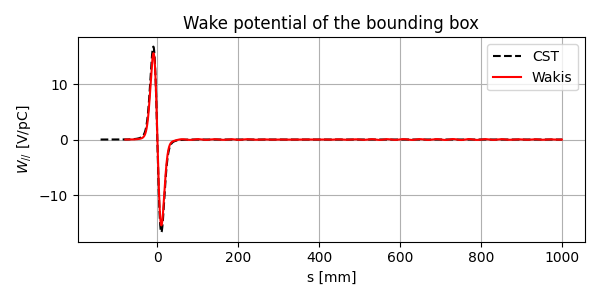

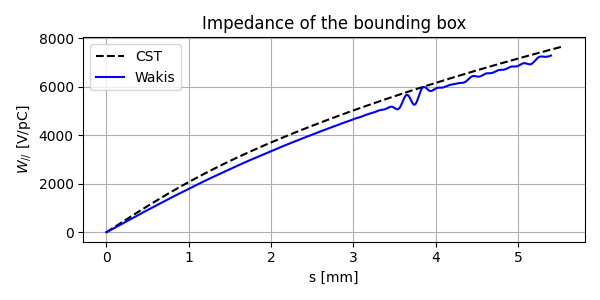

In [6]:
# CST wake and impedance
data = np.loadtxt(folder_cavity+'/CSTwake.txt')
cst_s_cav = data[:, 0]
cstWP_cav = data[:, 1]

CSTZ = np.loadtxt(folder_cavity+'/CSTZ.txt')
f = CSTZ[:,0]
cstZ = CSTZ[:,1]

data = np.loadtxt('CSTwake_bb.txt')
cst_s_bb = data[:, 0]
cstWP_bb = data[:, 1]

CSTZ_bb = np.loadtxt('CSTZ_bb.txt')
# f = CSTZ_bb[:,0]
cstZ_bb = CSTZ_bb[:,1]

# cstZReIm = wake.read_txt('CSTZReIm.txt')
# cstZReIm_bb = wake_bb.read_txt('CSTZReIm_bb.txt')

cstWP_bb = np.interp(cst_s_cav, cst_s_bb, cstWP_bb) # interpolation

# plot cst to check that the interpolations are aligned
# fig, ax = plt.subplots(figsize=(6, 3))
# ax.plot(cst_s_cav, cstWP_cav, c='g', ls='--', lw=1.5, label='structure')
# ax.plot(cst_s_cav, cstWP_bb, c='k', ls='--', lw=1.5, label='bb')
# # ax.set_xlim(0, 1000)
# # ax.set_ylim(-0.05, 0.05)
# ax.set_xlabel('s [mm]')
# ax.set_ylabel(r'$W_{//}$ [V/pC]', color='k')
# ax.legend()
# ax.grid(True)
# fig.tight_layout()
# plt.show()

# fig, ax = plt.subplots(figsize=(6, 3))
# ax.plot(cst_s_cav, cstWP_cav, c='k', ls='--', lw=1.5, label='CST')
# ax.plot(wake.s*1e3, wake.WP, c='r', lw=1.5, label='Wakis')
# # ax.set_xlim(0, 1000)
# # ax.set_ylim(-0.05, 0.05)
# ax.set_xlabel('s [mm]')
# ax.set_ylabel(r'$W_{//}$ [V/pC]', color='k')
# ax.set_title('Wake potential of the cavity')
# ax.legend()
# ax.grid(True)
# fig.tight_layout()
# plt.show()


fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(cst_s_cav, cstWP_bb, c='k', ls='--', lw=1.5, label='CST')
ax.plot(wake_bb.s*1e3, wake_bb.WP, c='r', lw=1.5, label='Wakis')
# ax.set_xlim(0, 1000)
# ax.set_ylim(-0.05, 0.05)
ax.set_xlabel('s [mm]')
ax.set_ylabel(r'$W_{//}$ [V/pC]', color='k')
ax.set_title('Wake potential of the bounding box')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('cfr_wake_bb.png')
plt.show()

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(f, cstZ_bb, c='k', ls='--', lw=1.5, label='CST')
ax.plot(wake.f*1e-9, np.abs(wake_bb.Z), c='b', lw=1.5, label='Wakis')
# ax.set_xlim(0, 1000)
# ax.set_ylim(-0.05, 0.05)
ax.set_xlabel('s [mm]')
ax.set_ylabel(r'$W_{//}$ [V/pC]', color='k')
ax.set_title('Impedance of the bounding box')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('cfr_Zmag_bb.png')
plt.show()






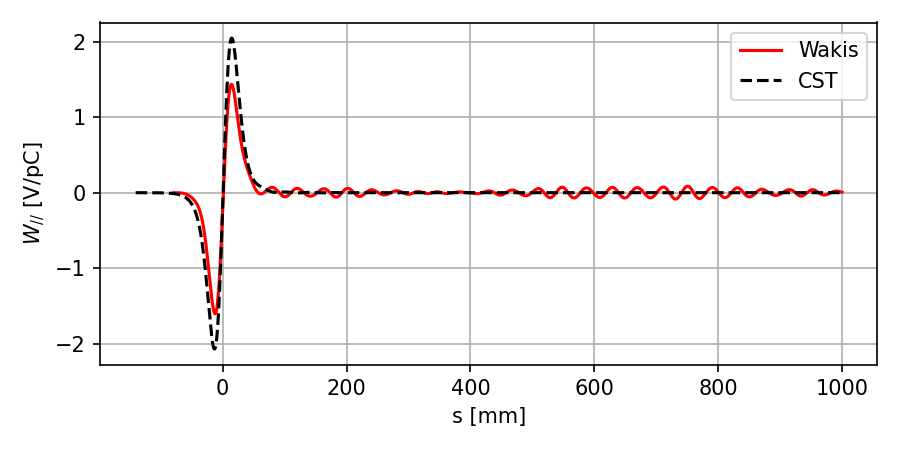

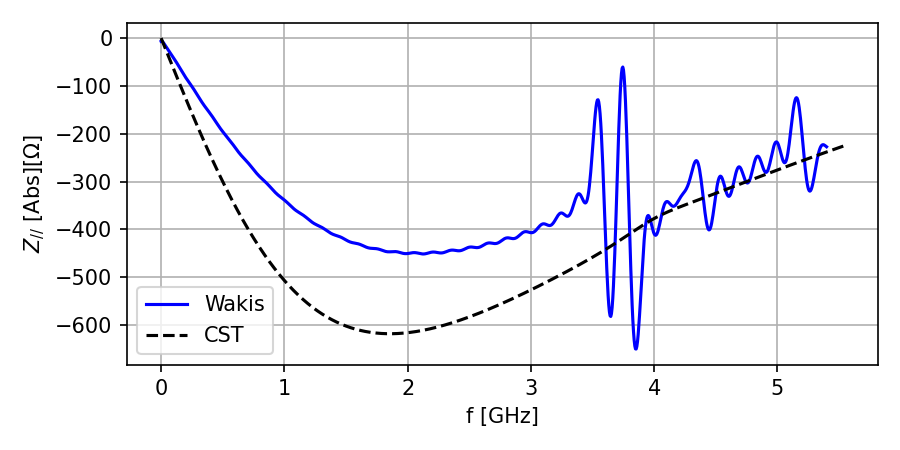

In [7]:
# # Perform the cancellation
cstWP_canc = cstWP_cav - cstWP_bb
cstZ_canc = cstZ-cstZ_bb


# WAKE after cancellation
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.s*1e3, wake.WP-wake_bb.WP, c='r', lw=1.5, label='Wakis')
ax.plot(cst_s_cav, cstWP_canc, c='k', ls='--', lw=1.5, label='CST')
# ax.set_xlim(0, 1000)
# ax.set_ylim(-0.05, 0.05)
ax.set_xlabel('s [mm]')
ax.set_ylabel(r'$W_{//}$ [V/pC]', color='k')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('cfr_wake_aftercancellation.png')
plt.show()


# IMPEDANCE after cancellation
fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.f*1e-9, np.abs(wake.Z)-np.abs(wake_bb.Z), c='b', lw=1.5, label='Wakis')
ax.plot(f, cstZ_canc, c='k', ls='--', lw=1.5, label='CST')
# ax.xlim(0,1000)
ax.set_xlabel('f [GHz]')
ax.set_ylabel(r'$Z_{//}$ [Abs][$\Omega$]', color='k')
ax.legend()
ax.grid(True)
#fig.suptitle('Benchmark with CST Wakefield Solver')
fig.tight_layout()
fig.savefig('cfr_Zmag_aftercancellation.png')
plt.show()

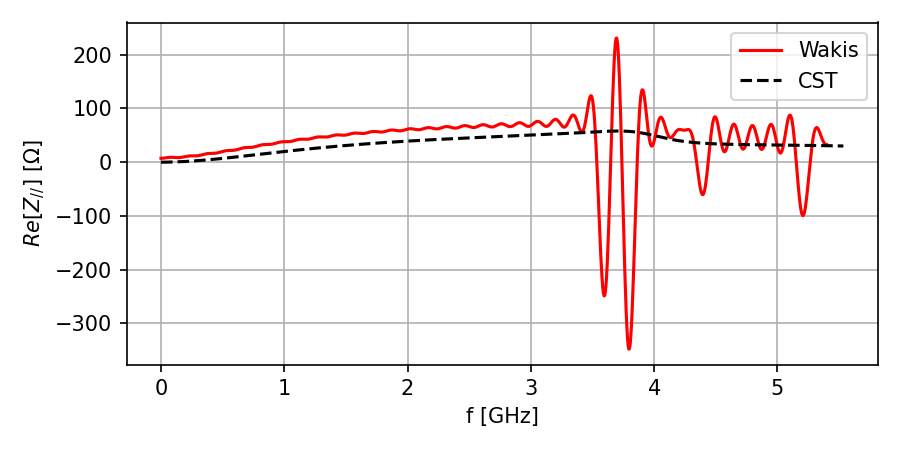

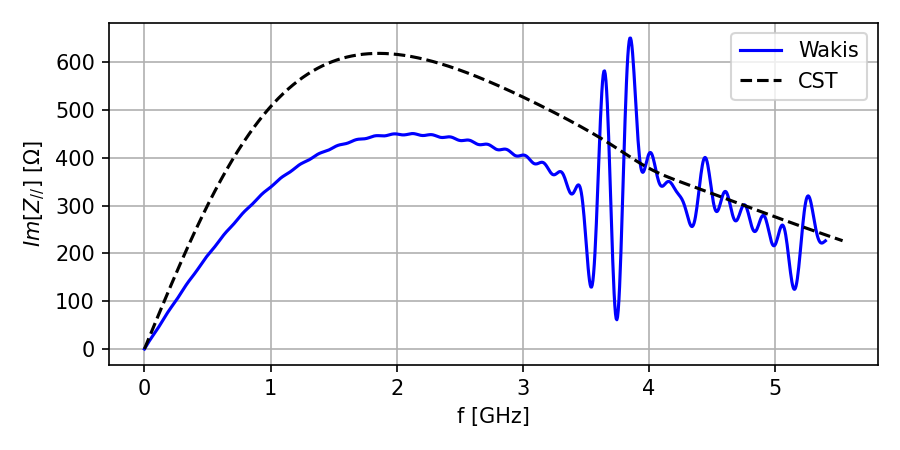

In [8]:
cstZReIm = wake.read_txt(folder_cavity+'/CSTZReIm.txt')
cstZReIm_bb = wake_bb.read_txt('CSTZReIm_bb.txt')


fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.f*1e-9, np.real(wake.Z)-np.real(wake_bb.Z), c='r', lw=1.5, label='Wakis')
ax.plot(cstZReIm[0], cstZReIm[1]-cstZReIm_bb[1], c='k', ls='--', lw=1.5, label='CST')
ax.set_xlabel('f [GHz]')
ax.set_ylabel(r'$Re[Z_{//}]$ [$\Omega$]', color='k')
ax.legend()
ax.grid(True)
fig.tight_layout()
fig.savefig('cfr_real_aftercancellation.png')
plt.show()

fig, ax = plt.subplots(figsize=(6, 3), dpi=150)
ax.plot(wake.f*1e-9, np.imag(wake.Z)-np.imag(wake_bb.Z), c='b', lw=1.5, label='Wakis')
ax.plot(cstZReIm[0], cstZReIm[2]-cstZReIm_bb[2], c='k', ls='--', lw=1.5, label='CST')
ax.set_xlabel('f [GHz]')
ax.set_ylabel(r'$Im[Z_{//}]$ [$\Omega$]', color='k')
ax.legend()
ax.grid(True)
#fig.suptitle('Benchmark with CST Wakefield Solver')
fig.tight_layout()
fig.savefig('cfr_imag_aftercancellation.png')
plt.show()